In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('filtered_customer_booking.csv')

In [3]:
df

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.shape

(49982, 15)

In [5]:
df.describe()

,Unnamed: 0,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000
mean,24999.957905,1.591133,84.754652,23.046757,9.065344,3.814253,0.668881,0.297047,0.427174,7.277333,0.149574
std,14433.587942,1.020217,89.923276,33.892624,5.412551,1.992722,0.470621,0.456962,0.494673,1.496829,0.356657
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,12500.250000,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,25000.500000,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,37498.750000,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,49999.000000,9.000000,495.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


## Sales channels

In [6]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.76395502380858 %
Number of bookings done through phone call: 11.236044976191428 %


## Trip Type

In [7]:
print(df.trip_type.value_counts()/ df.trip_type.count()*100)

RoundTrip     98.993638
OneWay         0.774279
CircleTrip     0.232084
Name: trip_type, dtype: float64


<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

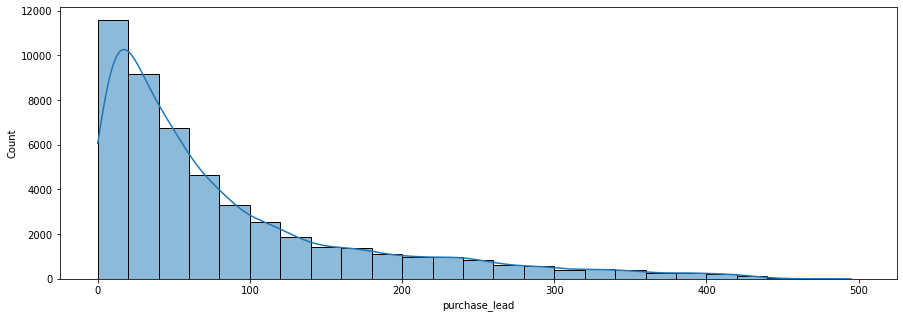

In [8]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

There are a limited number of reservations made over two years prior to the travel date, which appears quite improbable. Nevertheless, this could be attributed to instances of cancellation and subsequent rebooking within a span of six months, occurring twice. Typically, airlines retain tickets for rebooking within a year. However, for the purpose of our analysis, we will treat these cases as outliers that could significantly impact the results of our predictive model.

In [9]:
(df.purchase_lead >600).value_counts()

False    49982
Name: purchase_lead, dtype: int64

If we make the assumption that no customer is booking more than 1 and a half years in advance, we will proceed to eliminate all entries with a "purchase_lead" time exceeding 600 days.

## Length of stay

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

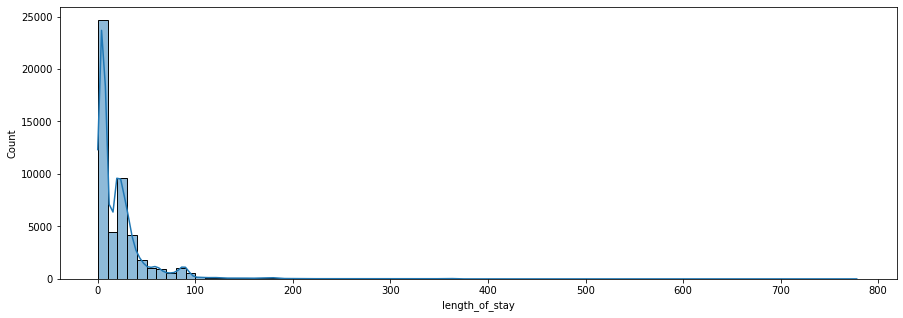

In [14]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'length_of_stay', kde = True, binwidth = 10)

Let's see how many entries do we have that exceeds length of stay more than 100 days.



In [23]:
(df.length_of_stay >100).value_counts()
temp = df[df.length_of_stay >100]

Hence we can say, 1138 passengers had welcomed their stay for more than 100 days

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

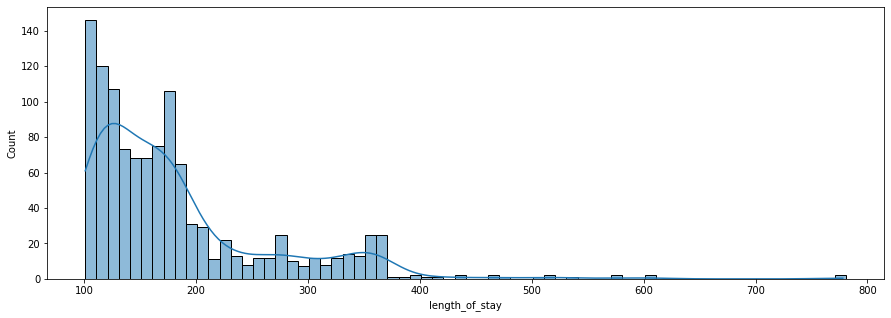

In [25]:
plt.figure(figsize = (15,5))
sns.histplot(data = temp, x = "length_of_stay", binwidth = 10, kde = True)

I recognize the importance of understanding the various factors that may lead to bookings with durations exceeding 600 days. However, for our immediate analysis, we will concentrate on bookings with a stay duration of less than 500 days

In [26]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

## Flight DayLet'sl map the flight day with a number of a week.

In [33]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [34]:
df

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,NaN,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,NaN,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,NaN,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,NaN,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,NaN,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,NaN,PERPNH,Australia,1,0,1,5.62,0
49978,49996,1,Internet,RoundTrip,111,6,4,NaN,PERPNH,Australia,0,0,0,5.62,0
49979,49997,1,Internet,RoundTrip,24,6,22,NaN,PERPNH,Australia,0,0,1,5.62,0
49980,49998,1,Internet,RoundTrip,15,6,11,NaN,PERPNH,Australia,1,0,1,5.62,0


In [35]:
df.flight_day.value_counts()

Series([], Name: flight_day, dtype: int64)